In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.spatial import distance_matrix
from PIL import Image

In [94]:
def tsp_brute_force(dist_matrix):
    n = len(dist_matrix)
    all_routes = permutations(range(n))
    shortest_route = None
    min_distance = float("inf")

    for route in all_routes:
        current_distance = sum(
            dist_matrix[route[i], route[i + 1]] for i in range(n - 1)
        ) + dist_matrix[route[-1], route[0]]

        if current_distance < min_distance:
            min_distance = current_distance
            shortest_route = route

    return shortest_route, min_distance

In [114]:
def plot_route_on_map(Cal_Poly_pomona, points, route, title = "Optimal Route on Campus"):
    img = Image.open(Cal_Poly_pomona)
    plt.figure(figsize = (8, 8))
    plt.imshow(img, extent = [0, 1, 0, 1], aspect = "auto")

    plt.scatter(points[:, 0], points[:, 1], c = "red", zorder = 5)
    for i, point in enumerate(points):
        plt.text(point[0], point[1], f"{i}", fontsize = 12)

    for i in range(len(route)):
        start = route[i]
        end = route[(i + 1) % len(route)]
        plt.plot([points[start, 0], points[end, 0]], [points[start, 1], points[end, 1]], "b-")

    plt.title(title)
    plt.show()

In [116]:
campus_points = np.array([[34.05837537513091, -117.82151531021476], 
                          [34.0603068980357, -117.82115454884296], 
                          [34.0599766733906, -117.82425561815788]]
                        )

In [118]:
dist_matrix = distance_matrix(campus_points, campus_points)

In [120]:
optimal_route, optimal_distance = tsp_brute_force(dist_matrix)

In [122]:
print(f"Optimal Route: {optimal_route}")
print(f"Optimal Distance: {optimal_distance}")

Optimal Route: (0, 1, 2)
Optimal Distance: 0.008257395823565293


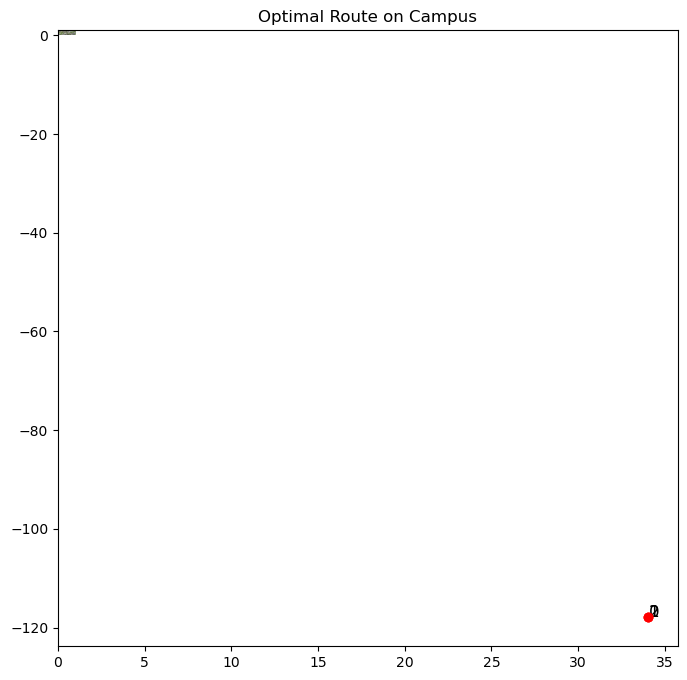

In [124]:
plot_route_on_map("Cal_Poly_pomona.png", campus_points, optimal_route)